<a href="https://colab.research.google.com/github/joelrobin18/S6-Code/blob/pytorch/Lesson/pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
## All the required Libraries
import torch as t
from torch import nn
import torchvision as tv
from torchvision import datasets as tvd
from torchvision import transforms as tvt
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchmetrics import Accuracy
from torchmetrics import ConfusionMatrix as CM
import pandas as pd
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [2]:
device = "cuda" if t.cuda.is_available() else "cpu"
device

'cuda'

### Creating our own Datasets using TorchVision

#### We use FashionMNIST

In [3]:
## Dataset Creation using FashionMNIST

train_data=tvd.FashionMNIST(
    root="data", ## Root directory
    train=True, ## Training or testing Dataset
    download=True, ## Download or not
    transform=tvt.ToTensor(), ## Any transforms using torch.transforms
    target_transform=None ## Transforms on target element
)

test_data=tvd.FashionMNIST(
    root="data",
    download=True,
    train=False,
    transform=tvt.ToTensor(),
    target_transform=None
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



### Dataset functions

#### .classes :- Shows us all the classes present
#### .class_to_idx :- Shows us all the dictionaries present

In [4]:
train_data[5],test_data[5]
print(len(train_data),len(test_data))
class_name=train_data.classes
class_to_idx=train_data.class_to_idx
print(class_name)
print(class_to_idx)

60000 10000
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


In [5]:
## Some more operations

image,label=train_data[0]
print(f"Image: {image} || Label: {label}")
print(f"Type of Image: {type(image)} || Type of Label: {type(label)}")
print(f"Shape of Image: {image.shape} || Shape of Label: {label}")

Image: tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 

(-0.5, 27.5, 27.5, -0.5)

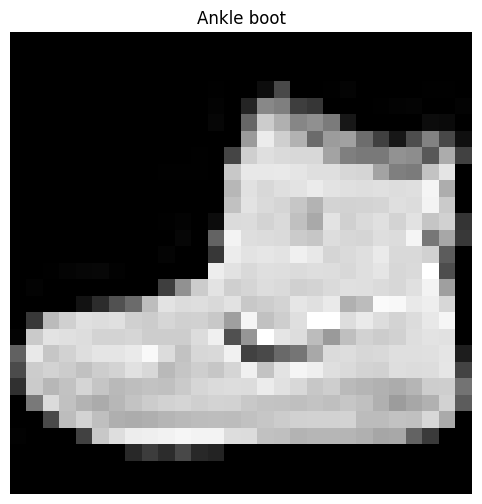

In [6]:
## Vizualization as Images

img,img_label=train_data[0]
plt.figure(figsize=(9,6))
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_name[img_label])
plt.axis(False)

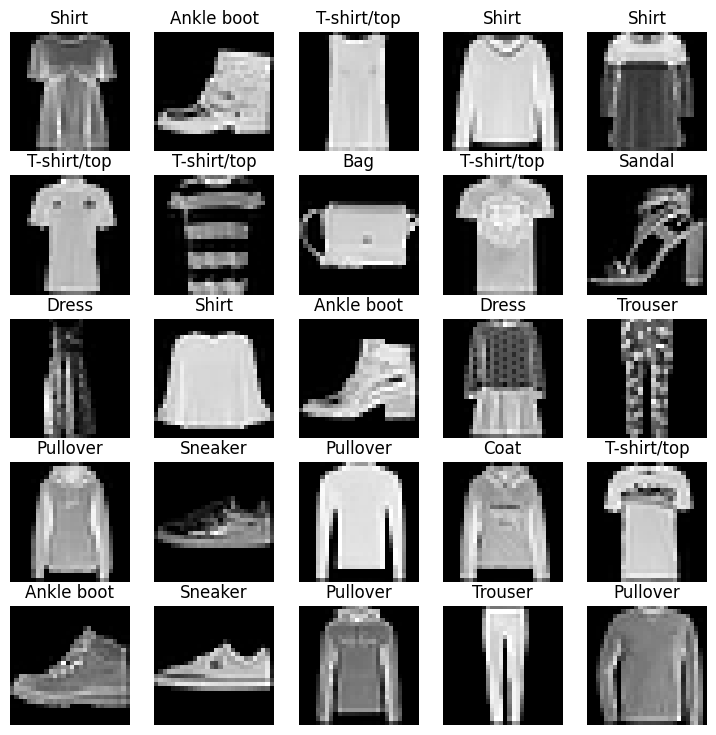

In [7]:
## Vizualize random images

t.manual_seed(0)

r=5
c=5
fig= plt.figure(figsize=(9,9))

for i in range(1,r*c+1):
    ind=t.randint(0,len(train_data),size=[1]).item()
    imgs,labels=train_data[ind]
    fig.add_subplot(r,c,i)
    plt.imshow(imgs.squeeze(),cmap="gray")
    plt.title(class_name[labels])
    plt.axis(False)

In [8]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [9]:
### Making mini batches using DataLoader

train_data_loader=DataLoader(
    train_data,
    batch_size=32,
    shuffle=True
)

test_data_loader=DataLoader(
    test_data,
    batch_size=32,
    shuffle=False
)

# train_data_loader.shape,test_data_loader.shape

In [10]:
## Printing Different atributes

print(f"Batch Size: {train_data_loader.batch_size}")
print(f"Num Workers: {train_data_loader.num_workers}")
print(f"Generator: {train_data_loader.generator}")
print(f"Data Set: {train_data_loader.dataset}")
print(f"Length of Train Data Set: {len(train_data_loader)}")
print(f"Length of Test Data Set: {len(test_data_loader)}")

Batch Size: 32
Num Workers: 0
Generator: None
Data Set: Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Length of Train Data Set: 1875
Length of Test Data Set: 313


Text(0.5, 1.0, 'Sneaker')

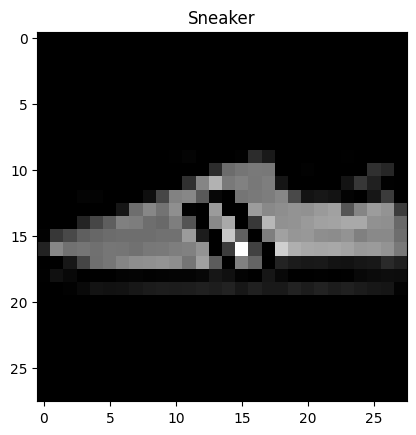

In [11]:
train_features,train_label=next(iter(train_data_loader))
train_features.shape,train_label.shape
### Creating Random Image from batch

ind = t.randint(0,len(train_features),size=[1]).item()
plt.imshow(train_features[ind].squeeze(),cmap="gray")
plt.title(class_name[train_label[ind]])

In [12]:
# Creating our BaseLine model

class Model0(nn.Module):
    def __init__(self,inp,hidden,out):
        super().__init__()
        
        self.l1=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=inp,out_features=hidden),
            nn.Linear(in_features=hidden,out_features=hidden),
            nn.Linear(in_features=hidden,out_features=out)
        )
        
    def forward(self,x):
        return self.l1(x)

In [13]:
a=train_features[0]
a.shape

flat= nn.Flatten()

b=flat(a)
b.shape

torch.Size([1, 784])

In [14]:
inp=784
hidd=15
out=len(class_name)
model0 = Model0(inp,hidd,out)

In [15]:
# Loss Function and Optimizer

loss_fn0 = nn.CrossEntropyLoss()
optim0 = t.optim.SGD(params=model0.parameters(),
                    lr=0.01)
accuracy = Accuracy(task="multiclass",num_classes=len(class_name))
conf=CM(task="multiclass",num_classes=len(class_name))

In [16]:
# Training and Testing Function

def train_function(model:t.nn.Module,
                    lossfn:t.nn.Module,
                    optim:t.optim.Optimizer,
                    data_loader:DataLoader, 
                    accuracy:Accuracy,
                    ):
    total_loss=0
    total_acc=0
    for count,(x,y) in enumerate(data_loader): ## Training dataset should be passed as the data_loader. It contain both data and corresponding labels assosiated with it
            
        model.train()
        y_pred=model(x)
        loss=lossfn(y_pred,y)
        acc=accuracy(y_pred,y)
        
        total_loss+=loss;
        total_acc+=acc;
        optim.zero_grad()
        loss.backward()
        optim.step()
    
    avg_loss=total_loss/len(data_loader)
    avg_acc=total_acc/len(data_loader)
    print(f"Train Loss: {avg_loss} || Train Accuracy: {avg_acc}")


def test_function(model:t.nn.Module,
                    lossfn:t.nn.Module,
                    optim:t.optim.Optimizer,
                    data_loader:DataLoader,
                    accuracy:Accuracy,
                    ):
    
    test_loss=0
    test_acc=0;
    
    for count,(x,y) in enumerate(data_loader):
        model.eval()
        y_pred=model(x)
        loss=lossfn(y_pred,y)
        acc=accuracy(y_pred,y)
        optim.zero_grad()
        loss.backward()
        optim.step()
        
        test_loss+=loss
        test_acc+=acc
        
    test_loss/=len(data_loader)
    test_acc/=len(data_loader)
    
    print(f"Count: {count}|| Length: {len(data_loader)}")
    print(f"Test Loss: {test_loss} || Test Accuracy: {test_acc}")

In [18]:
# Training and Testing Loop for our Model

epochs=10
t.manual_seed(42)
for epoch in range(epochs):
    print(f"Epoch: {epoch}")
    train_function(model0,loss_fn0,optim0,train_data_loader,accuracy)
    test_function(model0,loss_fn0,optim0,test_data_loader,accuracy)

Epoch: 0
Train Loss: 0.41568300127983093 || Train Accuracy: 0.8551333546638489
Count: 312|| Length: 313
Test Loss: 0.44134658575057983 || Test Accuracy: 0.842851459980011
Epoch: 1
Train Loss: 0.4132104814052582 || Train Accuracy: 0.856166660785675
Count: 312|| Length: 313
Test Loss: 0.4381982088088989 || Test Accuracy: 0.8442491888999939
Epoch: 2
Train Loss: 0.41024792194366455 || Train Accuracy: 0.8570166826248169
Count: 312|| Length: 313
Test Loss: 0.4349500834941864 || Test Accuracy: 0.8449480533599854
Epoch: 3
Train Loss: 0.40692979097366333 || Train Accuracy: 0.8585000038146973
Count: 312|| Length: 313
Test Loss: 0.4325275719165802 || Test Accuracy: 0.8456469774246216
Epoch: 4
Train Loss: 0.4050780236721039 || Train Accuracy: 0.8592166900634766
Count: 312|| Length: 313
Test Loss: 0.4302588403224945 || Test Accuracy: 0.8469448685646057
Epoch: 5
Train Loss: 0.40279698371887207 || Train Accuracy: 0.8607500195503235
Count: 312|| Length: 313
Test Loss: 0.4281314015388489 || Test Accura

In [19]:
# Building our Model with non Linearity

class Model1(nn.Module):
    def __init__(self,inp,hid,out):
        super().__init__()
        
        self.l1=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=inp,out_features=hid),
            nn.ReLU(),
            nn.Linear(in_features=hid,out_features=hid),
            nn.ReLU(),
            nn.Linear(in_features=hid,out_features=hid),
            nn.ReLU(),
            nn.Linear(in_features=hid,out_features=hid),
            nn.ReLU(),
            nn.Linear(in_features=hid,out_features=hid),
            nn.ReLU(),
            nn.Linear(in_features=hid,out_features=out),
            nn.ReLU()
        )
    
    def forward(self,x:t.Tensor):
        return self.l1(x)

In [20]:
model1=Model1(inp,hidd,out)
# Loss and Optimizer Fuction

loss_fn1=nn.CrossEntropyLoss()
optim1=t.optim.SGD(params=model1.parameters(),
                lr=0.01)

In [21]:
# Traning and Testing Loop for our Model1

epochs = 10
for epoch in range(epochs):
    print(f"Epoch: {epoch}")
    train_function(model1,loss_fn1,optim1,train_data_loader,accuracy)
    test_function(model1,loss_fn1,optim1,test_data_loader,accuracy)

Epoch: 0
Train Loss: 2.298628568649292 || Train Accuracy: 0.16404999792575836
Count: 312|| Length: 313
Test Loss: 2.2681572437286377 || Test Accuracy: 0.19908146560192108
Epoch: 1
Train Loss: 1.9465833902359009 || Train Accuracy: 0.2237333357334137
Count: 312|| Length: 313
Test Loss: 1.7415416240692139 || Test Accuracy: 0.3422524034976959
Epoch: 2
Train Loss: 1.522265076637268 || Train Accuracy: 0.44495001435279846
Count: 312|| Length: 313
Test Loss: 1.2817970514297485 || Test Accuracy: 0.5540135502815247
Epoch: 3
Train Loss: 1.1765315532684326 || Train Accuracy: 0.5916500091552734
Count: 312|| Length: 313
Test Loss: 1.1130244731903076 || Test Accuracy: 0.6208066940307617
Epoch: 4
Train Loss: 1.0443843603134155 || Train Accuracy: 0.6435499787330627
Count: 312|| Length: 313
Test Loss: 1.009575605392456 || Test Accuracy: 0.6518570184707642
Epoch: 5
Train Loss: 0.9639630317687988 || Train Accuracy: 0.6646333336830139
Count: 312|| Length: 313
Test Loss: 0.956008791923523 || Test Accuracy: 

In [23]:
# Building our Convolutional Model using CNN

class Model3(nn.Module):
    def __init__(self,inp,hidd,out):
        super().__init__()
        self.l1=nn.Sequential(
                    nn.Conv2d(in_channels=inp,
                                out_channels=hidd,
                                kernel_size=3,
                                padding=1),
                    nn.ReLU(),
                    nn.Conv2d(in_channels=hidd,
                                out_channels=hidd,
                                kernel_size=3,
                                padding=1),
                    nn.ReLU(),
                    nn.Conv2d(in_channels=hidd,
                                out_channels=hidd,
                                kernel_size=3,
                                padding=1),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2))
        
        self.l2=nn.Sequential(
            nn.Conv2d(
                in_channels=hidd,
                out_channels=hidd,
                kernel_size=3,
                padding=1
            ),
            nn.Conv2d(
                in_channels=hidd,
                out_channels=hidd,
                kernel_size=3,
                padding=1
            ),
            nn.ReLU()
        )
        
        self.l3=nn.Sequential(
            nn.Conv2d(in_channels=hidd,
                out_channels=hidd,
                kernel_size=3,
                padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.classifier=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidd*49,
                    out_features=out)
        )
    
    def forward(self,x:t.Tensor):
        return self.classifier(self.l3(self.l2(self.l1(x))))

In [24]:
model3=Model3(1,hidd,out)
model3

Model3(
  (l1): Sequential(
    (0): Conv2d(1, 15, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(15, 15, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(15, 15, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (l2): Sequential(
    (0): Conv2d(15, 15, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Conv2d(15, 15, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): ReLU()
  )
  (l3): Sequential(
    (0): Conv2d(15, 15, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=735, out_features=10, bias=True)
  )
)

In [25]:
loss_fn3=nn.CrossEntropyLoss()
optim3=t.optim.SGD(params=model3.parameters(), 
                    lr=0.01)

In [26]:
epochs = 10
for epoch in range(epochs):
    print(f"Epochs: {epoch}")
    train_function(model3,loss_fn3,optim3,train_data_loader,accuracy)
    test_function(model3,loss_fn3,optim3,test_data_loader,accuracy)

Epochs: 0
Train Loss: 1.4775598049163818 || Train Accuracy: 0.45256665349006653
Count: 312|| Length: 313
Test Loss: 0.6306532621383667 || Test Accuracy: 0.7707667946815491
Epochs: 1
Train Loss: 0.49641844630241394 || Train Accuracy: 0.8225499987602234
Count: 312|| Length: 313
Test Loss: 0.4565172791481018 || Test Accuracy: 0.8387579917907715
Epochs: 2
Train Loss: 0.4021745026111603 || Train Accuracy: 0.8560000061988831
Count: 312|| Length: 313
Test Loss: 0.398421049118042 || Test Accuracy: 0.8565295338630676
Epochs: 3
Train Loss: 0.3589978814125061 || Train Accuracy: 0.8735499978065491
Count: 312|| Length: 313
Test Loss: 0.3642088770866394 || Test Accuracy: 0.8687100410461426
Epochs: 4
Train Loss: 0.3321486711502075 || Train Accuracy: 0.8805999755859375
Count: 312|| Length: 313
Test Loss: 0.34142181277275085 || Test Accuracy: 0.8765974640846252
Epochs: 5
Train Loss: 0.3126641809940338 || Train Accuracy: 0.8882166743278503
Count: 312|| Length: 313
Test Loss: 0.3247857987880707 || Test A

In [27]:
def model_analysis(model:nn.Module,
                    loss:nn.Module,
                    accuracy:Accuracy,
                    data_loader:DataLoader):

    epochs =4
    test_loss=0
    test_acc=0
    for count,(x,y) in enumerate(data_loader):
        model.eval()
        y_pred=model(x)
        test_loss+=loss(y_pred,y)
        test_acc+=accuracy(y_pred,y)
    
    test_loss/=len(data_loader)
    test_acc/=len(data_loader)
    test_acc*=100
    
    return {
        "Model Name":model.__class__.__name__,
        "Test Loss":test_loss.item(),
        "Accuracy":test_acc.item(),
    }

In [28]:
model_anal0=model_analysis(model0,loss_fn0,accuracy,test_data_loader)
model_anal1=model_analysis(model1,loss_fn1,accuracy,test_data_loader)
model_anal3=model_analysis(model3,loss_fn3,accuracy,test_data_loader)

In [29]:
analysis= pd.DataFrame([model_anal0,model_anal1,model_anal3])
analysis

,Model Name,Test Loss,Accuracy
0,Model0,0.423348,84.744415
1,Model1,0.841099,69.808304
2,Model3,0.289278,88.977638


In [63]:
#Save our Model
from pathlib import Path
MODEL_PATH=Path("./Models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME="computer_vision_model3.pth"
MODEL_SAVE_PATH=MODEL_PATH / MODEL_NAME

t.save(obj=model3.state_dict(),f=MODEL_SAVE_PATH)

`Create a prediction function`

`Take the model and corresponding parameters`

`Random Data from Samples`

`Raw logits -> prediction prob -> Prediction Values`

`Display them`

In [31]:
# Making predictions

def prediction(model:nn.Module,
                data:list):
    model.eval()
    y_pred_list=[]
    for sample in data:
        # sample=t.unsqueeze(sample,dim=0)
        y_pred_logit=model(sample)
        y_pred=t.softmax(y_pred_logit.squeeze(),dim=0)
        y_pred_list.append(y_pred)
    
    return t.stack(y_pred_list)

In [32]:
# Creating an array of random data
import random

pred_image=[]
pred_label=[]
for image,label in random.sample(list(test_data),k=12):
    pred_image.append(image) # Our data for making the prediction
    pred_label.append(label)

y_pred_label=prediction(model0,pred_image)
pred_classes=y_pred_label.argmax(dim=1)
y_pred_label

tensor([[5.5137e-03, 9.7535e-05, 6.4464e-03, 1.5361e-02, 8.3328e-01, 8.3227e-12,
         1.3352e-01, 2.0303e-11, 5.7802e-03, 1.7483e-15],
        [3.4130e-04, 3.0970e-08, 5.8643e-05, 1.8518e-07, 5.6278e-05, 1.1220e-11,
         1.6054e-03, 1.2443e-07, 9.9794e-01, 1.9100e-09],
        [4.4555e-16, 3.4036e-20, 1.8484e-16, 2.0388e-17, 1.0578e-19, 2.8570e-03,
         9.1175e-16, 1.5446e-06, 1.0446e-11, 9.9714e-01],
        [7.5399e-05, 9.9742e-01, 4.6455e-05, 2.2405e-03, 2.1063e-04, 1.8265e-16,
         9.3436e-06, 1.3808e-08, 3.6034e-08, 1.2420e-11],
        [7.6578e-06, 2.2638e-06, 4.3703e-05, 1.5088e-05, 1.8383e-05, 9.9896e-01,
         2.7019e-05, 4.4275e-04, 4.6593e-04, 2.1455e-05],
        [8.0106e-02, 2.8672e-04, 1.7572e-01, 1.8510e-01, 2.0790e-02, 2.8910e-12,
         5.3211e-01, 3.3610e-11, 5.8812e-03, 1.2038e-12],
        [1.7094e-02, 2.2070e-03, 5.5395e-03, 9.6648e-01, 2.6948e-03, 3.5477e-14,
         5.9352e-03, 5.7815e-09, 4.8405e-05, 1.2144e-09],
        [3.0550e-04, 7.3374

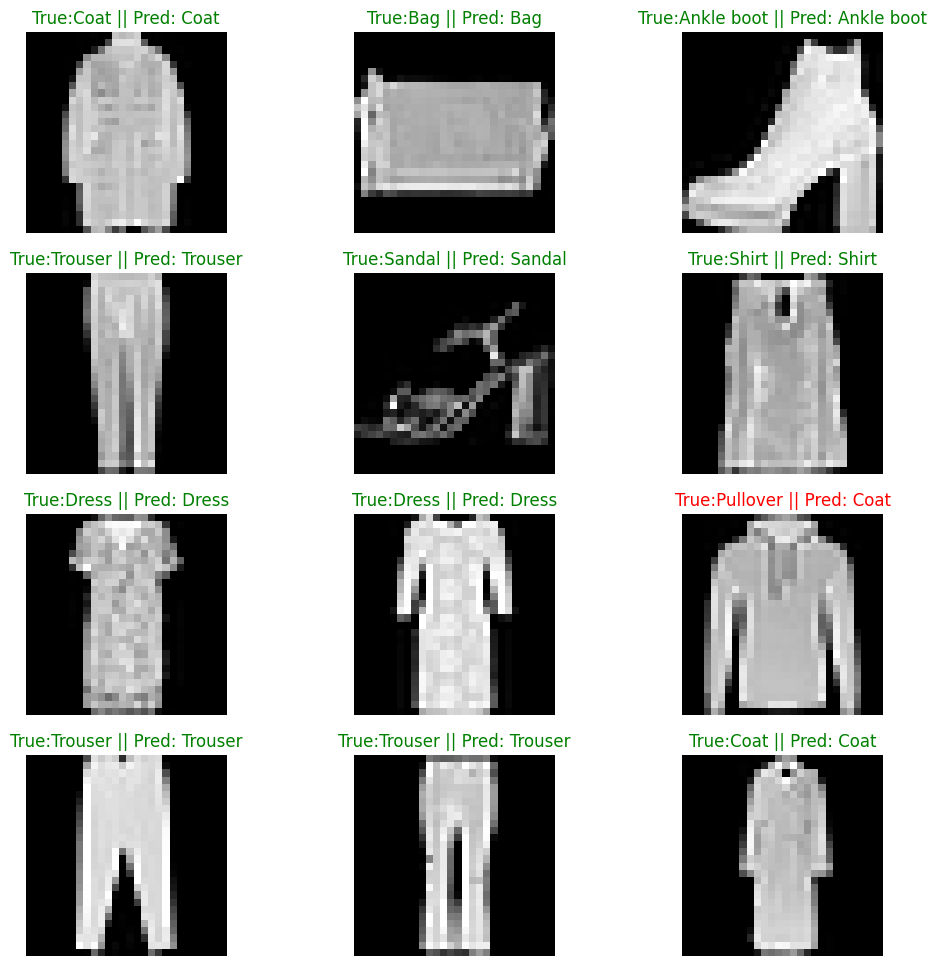

In [33]:
# Displaying our Predictions
r=4
c=3
plt.figure(figsize=(12,12))

for i,sample in enumerate(pred_image):
    plt.subplot(r,c,i+1)
    plt.imshow(sample.squeeze(),cmap="gray")
    
    true_title=class_name[pred_label[i]]
    pred_title=class_name[pred_classes[i]]
    if true_title==pred_title:
        plt.title(f"True:{true_title} || Pred: {pred_title}",c='g')
    else:
        plt.title(f"True:{true_title} || Pred: {pred_title}",c='r')
    plt.axis(False)

In [64]:
# Confusion Matrix
from tqdm.auto import tqdm

y_preds=[]

for x,y in tqdm(test_data_loader):
    model3.eval()
    y_pred_all_logit=model3(x)
    y_pred_values=t.softmax(y_pred_all_logit,dim=1).argmax(dim=1)
    y_preds.append(y_pred_values)

y_preds=t.cat(y_preds)
y_preds = list(y_preds)

  0%|          | 0/313 [00:00<?, ?it/s]

In [65]:
label_org = []
for i in test_data:
    img,label = i
    label_org.append(label)

cm = confusion_matrix(y_preds , label_org)
print(cm)

[[673   1   8  16   0   0  43   0   1   0]
 [  0 982   0   6   1   0   2   0   1   0]
 [ 13   0 824  11  55   0  39   0   2   0]
 [ 12   9   4 871  17   0  17   0   2   0]
 [  3   2  55  28 791   0  39   0   2   0]
 [  1   0   0   0   0 981   0   7   1   2]
 [291   5 106  65 134   0 849   0   6   1]
 [  0   0   0   0   0  14   0 972   4  25]
 [  7   1   3   3   2   1  11   0 981   0]
 [  0   0   0   0   0   4   0  21   0 972]]


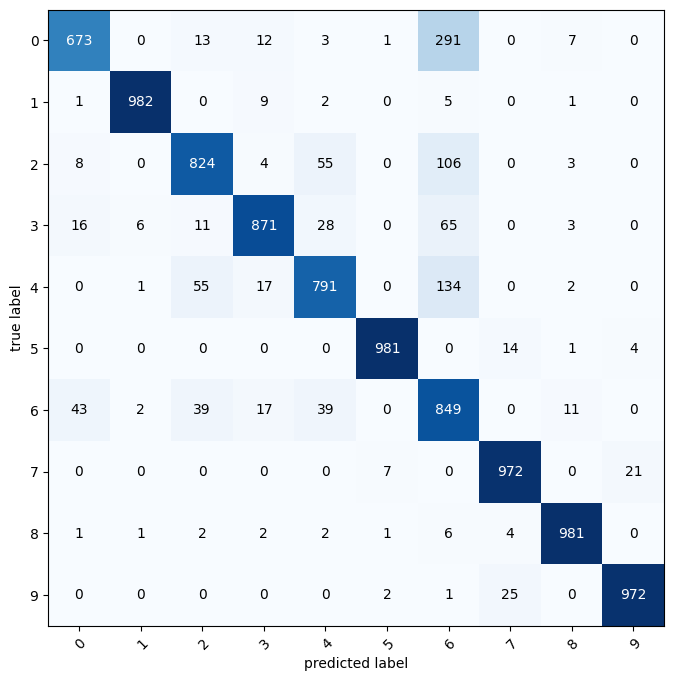

In [66]:
y_preds = t.tensor(y_preds)
label_org = t.tensor(label_org)

confMatrix=CM(task="multiclass",num_classes=len(class_name))

class_label=['0','1','2','3','4','5','6','7','8','9']
predMatrix=confMatrix(preds=y_preds,
                            target=label_org)

fig,ax=plot_confusion_matrix(
        conf_mat=predMatrix.numpy(),
        class_names=class_label,
        figsize=(8,8)
    )